#     Bayes Project: Smooth fit to log-Odds Ratios.
#     (Oxford Case)

### Authors: 
---
* Abdellah Koutit
* Saâd AZIZ ALAOUI
* Simone IANNELLI 
* Karim IDRISSI

---

## Imports

In [14]:
import numpy as np
import pandas as pd
from scipy.special import expit
from numpy.random import gamma, normal
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange

In [15]:
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6,  
               5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 
               8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 
               4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 
               9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 
               9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 
               7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 
               4, 1, 4, 5, 2, 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 
               5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 
               8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 
               9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 
               3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 
               40, 29, 44, 52, 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 
               40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 43, 39, 35, 
               32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 
               60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 
               63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63, 
               59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 
               51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, 
                 -5, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, 
                 -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, 
                 -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
                 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 
                 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])


df = pd.DataFrame({'year': year,'n0': n0, 'n1': n1, 'r0': r0, 'r1':r1})
df.reset_index(drop=True, inplace=True)
df

,year,n0,n1,r0,r1
0,-10,28,28,0,3
1,-9,21,21,2,5
2,-9,32,32,2,2
3,-8,35,35,1,7
4,-8,35,35,2,7
...,...,...,...,...,...
115,8,51,51,2,5
116,8,42,42,4,7
117,9,46,46,6,6
118,9,54,54,4,3


## Fonctions Utilitaires pour le code


In [16]:
#computes probablitiy p0 following the model
def po_proba(mu, alpha, beta1, beta2, b, year):

    return expit(mu + alpha + beta1 * year + beta2 * (year ** 2 - 22) + b)

In [17]:
#computes the log of the likelihood function
def log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year):

    p1 = po_proba(mu, alpha, beta1, beta2, b, year)
    
    return np.sum(r1 * np.log(p1)) + np.sum((n1 - r1) * np.log(1 - p1))

In [18]:
# #initialization function
# def init_chain(N, chain_type=1):

#     if chain_type == 1:
#         alpha, beta1, beta2, sigma2 = 0, 0, 0, 1
#     else:
#         alpha, beta1, beta2, sigma2 = 1, 1, 1, 10

#     mu = np.zeros(N)
#     b = np.zeros(N)

#     return alpha, beta1, beta2, sigma2, mu, b

In [19]:
def gibbs_sampling(nchain, df , prop_sd):
    
    #nchain nombre d'années
    
    r0, n0, r1, n1, year = df['r0'], df['n0'], df['r1'], df['n1'], df['year']
    N = df.shape[0]
    
    alpha, beta1, beta2, sigma2 = 0 , 0 , 0 , 1
    mu, b = np.zeros(N) , np.zeros(N)
    
    #proposal standard deviation
    # prop_sd=np.array([0.06, 0.03, 0.006, 0.1, 0.5])

    
    log_psi = alpha + beta1 * year + beta2 * (year**2 - 22) + b
    p0 = expit(mu)
    p1 = expit(mu + log_psi)
    
    chain4 = np.zeros((nchain+1, 4)) 
    b_chain = np.zeros((nchain+1, N)) 
    mu_chain = np.zeros((nchain+1, N)) 
    
    
    # Chain Init
    chain4[0,0] = alpha
    chain4[0,1] = beta1
    chain4[0,2] = beta2
    chain4[0,3] = sigma2
    b_chain[0,:] = b
    mu_chain[0,:] = mu

    acc_rate = np.zeros(3)
    b_acc_rate = np.zeros(120)
    mu_acc_rate = np.zeros(120)
    
    # remplissons la chaîne
    for i in trange(nchain):
        
        LVR = log_likelihood(mu, alpha, beta1, beta2, b, r1, n1, year)
        
        # update alpha
        prop_alpha = np.random.normal(loc=alpha, scale=prop_sd[0])
        prop_p1_alpha = po_proba(mu, prop_alpha, beta1, beta2, b, year)

        top_alpha = - (prop_alpha ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_alpha)) + np.sum((n1 - r1) * np.log(1 - prop_p1_alpha))
        bottom_alpha = - (alpha ** 2 / (2 * 1e6)) + LVR
        acc_prob_alpha = np.exp(top_alpha - bottom_alpha)
        
        U = np.random.uniform()
        if U < acc_prob_alpha:
            alpha = prop_alpha
            p1 = prop_p1_alpha
            acc_rate[0] += 1
        
        # update beta1
        prop_beta1 = np.random.normal(loc=beta1, scale=prop_sd[1])
        prop_p1_beta1 = po_proba(mu, alpha, prop_beta1, beta2, b, year)

        top_beta1 = - (prop_beta1 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta1)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta1))
        bottom_beta1 = - (beta1 ** 2 / (2 * 1e6)) + LVR
        acc_prob_beta1 = np.exp(top_beta1 - bottom_beta1)

        U = np.random.uniform()
        if U < acc_prob_beta1:
            beta1 = prop_beta1
            p1 = prop_p1_beta1
            acc_rate[1] += 1
            
        # update beta2
        prop_beta2 = np.random.normal(loc=beta2, scale=prop_sd[2])
        prop_p1_beta2 = po_proba(mu, alpha, beta1, prop_beta2, b, year)

        top_beta2 = - (prop_beta2 ** 2 / (2 * 1e6)) + np.sum(r1 * np.log(prop_p1_beta2)) + np.sum((n1 - r1) * np.log(1 - prop_p1_beta2))
        bottom_beta2 = - (beta2 ** 2 / (2 * 1e6)) + LVR
        acc_prob_beta2 = np.exp(top_beta2 - bottom_beta2)

        U = np.random.uniform()
        if U < acc_prob_beta2:
            beta2 = prop_beta2
            p1 = prop_p1_beta2
            acc_rate[2] += 1
            
        # update sigma2
        sigma2 = 1/gamma(shape = 1e-3 + N/2, scale = 1e-3 + 0.5 * sum(b**2))
            
        for j in range(N):
            
            # update mu
            prop = normal(loc = mu[j], scale = prop_sd[3])
            prop_p0 = expit(prop)
            prop_p1 = expit(prop + log_psi[j])
            
            top_mu = - (prop**2 / (2 * 1e6)) + r0[j] * np.log(prop_p0) + (n0[j] - r0[j]) * np.log(1 - prop_p0) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_mu = - (mu[j]**2 / (2 * 1e6)) + r0[j] * np.log(p0[j]) + (n0[j] - r0[j]) * np.log(1 - p0[j]) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_mu - bottom_mu)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                p0[j] = prop_p0
                p1[j] = prop_p1
                mu_acc_rate[j] += 1
                
                
            # update b
            prop = normal(loc = b[j], scale = prop_sd[4])
            prop_log_psi = alpha + beta1 * year[j] + beta2 * (year[j]**2 - 22) + prop
            prop_p1 = expit(mu[j] + prop_log_psi)
            
            top_b = - (prop**2 / (2 * sigma2)) + r1[j] * np.log(prop_p1) + (n1[j] - r1[j]) * np.log(1 - prop_p1)
            bottom_b = - (b[j]**2 / (2 * sigma2)) + r1[j] * np.log(p1[j]) + (n1[j] - r1[j]) * np.log(1 - p1[j])
            
            acc_prob = np.exp(top_b - bottom_b)
            
            if np.random.uniform() < acc_prob:
                b[j] = prop
                log_psi[j] = prop_log_psi
                p1[j] = prop_p1
                b_acc_rate[j] += 1
    
        
        # update of the chains
        chain4[i+1,:] = np.array([alpha, beta1, beta2, sigma2])
        b_chain[i+1,:] = b 
        mu_chain[i+1,:] = mu
        
    # return the three chains
    return chain4, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate

In [20]:
#number of chains
nchain=10000
chain4, b_chain, mu_chain, acc_rate, b_acc_rate, mu_acc_rate= gibbs_sampling(nchain, df,np.array([0.06, 0.03, 0.006, 0.1, 0.5]))

  0%|          | 4/10000 [00:00<12:43, 13.10it/s]

100%|██████████| 10000/10000 [05:53<00:00, 28.32it/s]


In [21]:
burn_in=1000
# 1000 premières itérations sont le burn in pour nous 
alpha = chain4[burn_in:,0]
beta1 =  chain4[burn_in:,1]
beta2 = chain4[burn_in:,2]
sigma2 = chain4[burn_in:,3]
sigma = np.sqrt(sigma2)

results = pd.DataFrame()
results['alpha']=alpha
results['beta1']=beta1
results['beta2']=beta2
results['sigma']=sigma

In [22]:
results.head()

,alpha,beta1,beta2,sigma
0,0.553408,-0.042962,0.003286,0.126232
1,0.543320,-0.057258,0.007450,0.118476
2,0.543320,-0.048500,0.007450,0.138655
3,0.543320,-0.055267,0.004423,0.137024
4,0.526020,-0.055267,0.004423,0.131052


## Acc Rates des paramètres

In [23]:
print("Le taux d'acceptation de alpha :" + str(acc_rate[0] / 100) + "%")
mean_alpha = np.mean(chain4[:,0])
print("La moyenne empirique de alpha :" + str(mean_alpha))
sd_alpha = np.std(chain4[:,0])
print("L'écart-type empirique de alpha :" + str(sd_alpha))

Le taux d'acceptation de alpha :56.49%
La moyenne empirique de alpha :0.5597618262513556
L'écart-type empirique de alpha :0.11831919940323117


In [24]:
print("Le taux d'acceptation de beta1 :" + str(acc_rate[1] / 100) + "%")
mean_beta_1 = np.mean(chain4[:,1])
print("La moyenne empirique de beta1 :" + str(mean_beta_1))
sd_beta_1 = np.std(chain4[:,1])
print("L'écart-type empirique de beta1 :" + str(sd_beta_1))

Le taux d'acceptation de beta1 :36.02%
La moyenne empirique de beta1 :-0.04453653475568643
L'écart-type empirique de beta1 :0.016296334378831302


In [25]:
print("Le taux d'acceptation de beta2 :" + str(acc_rate[2] / 100) + "%")
mean_beta_2 = np.mean(chain4[:,2])
print("La moyenne empirique de beta2 :" + str(mean_beta_2))
sd_beta_2 = np.std(chain4[:,2])
print("L'écart-type empirique de beta2 :" + str(sd_beta_2))

Le taux d'acceptation de beta2 :34.28%
La moyenne empirique de beta2 :0.006383097997308103
L'écart-type empirique de beta2 :0.0033319773573059386


In [26]:
mean_sigma = np.mean(np.sqrt(chain4[:,3]))
print("La moyenne empirique de sigma :" + str(mean_sigma))
sd_sigma = np.std(np.sqrt(chain4[:,3]))
print("L'écart-type empirique de sigma :" + str(sd_sigma))

La moyenne empirique de sigma :0.12995448560658632
L'écart-type empirique de sigma :0.041547108847401204


## Visualisation des paramètres obtenus $\alpha$, $\beta_1$, $\beta_2$ et $\sigma$ :

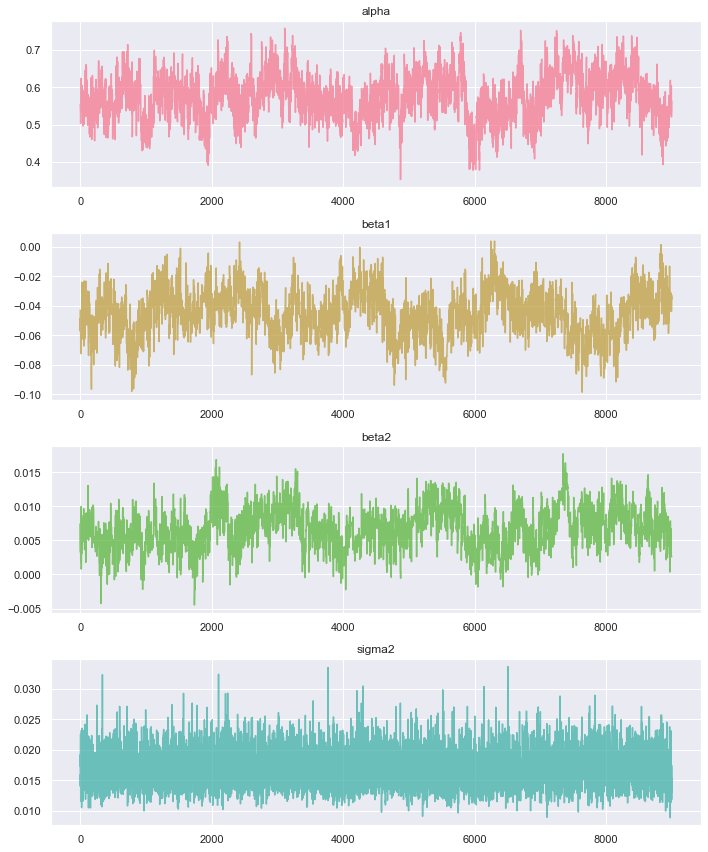

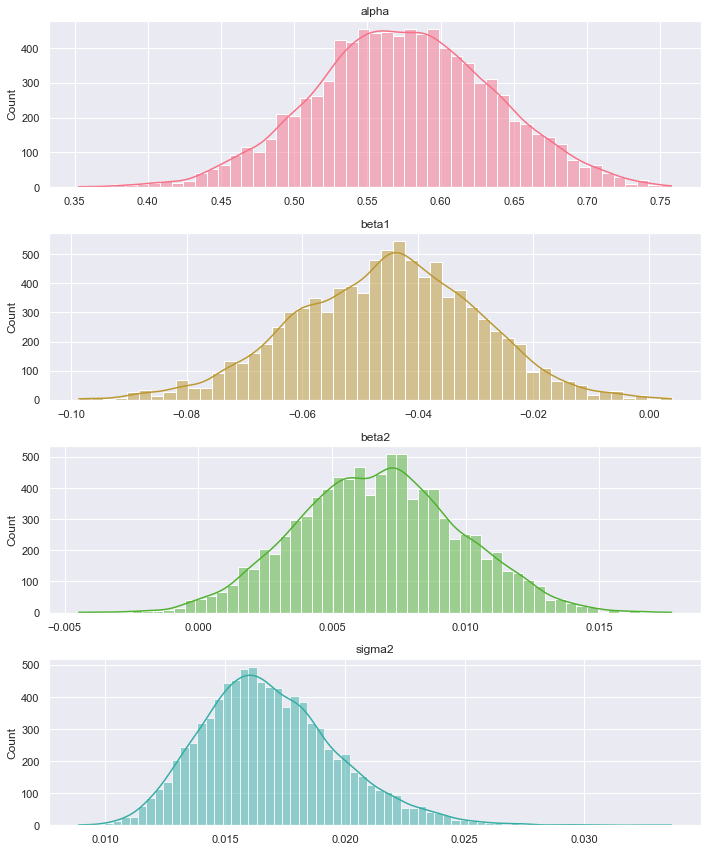

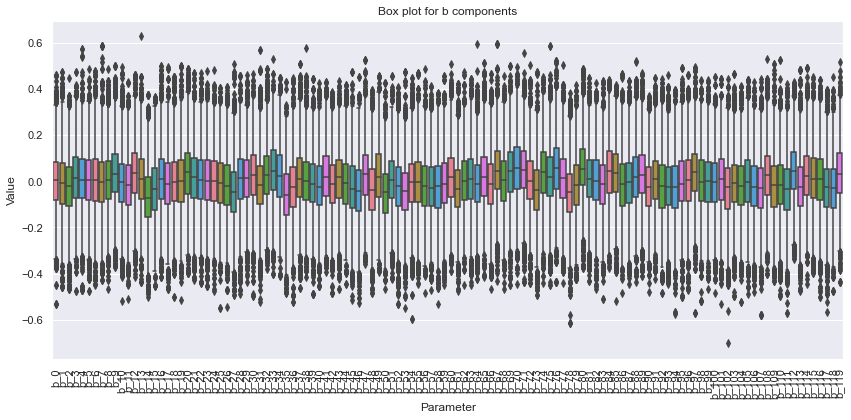

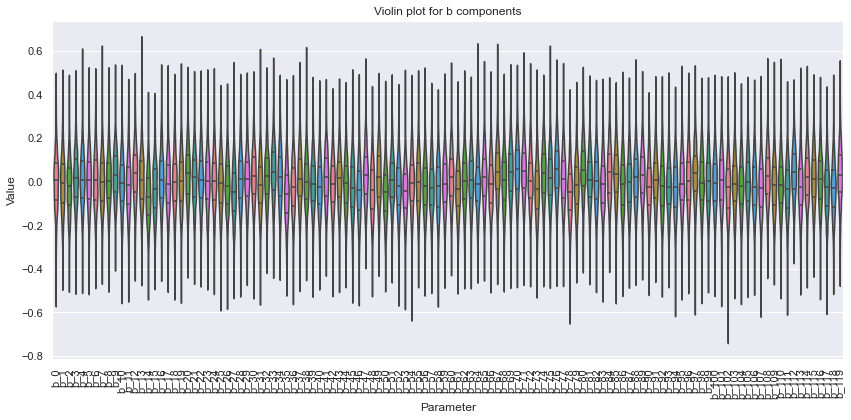

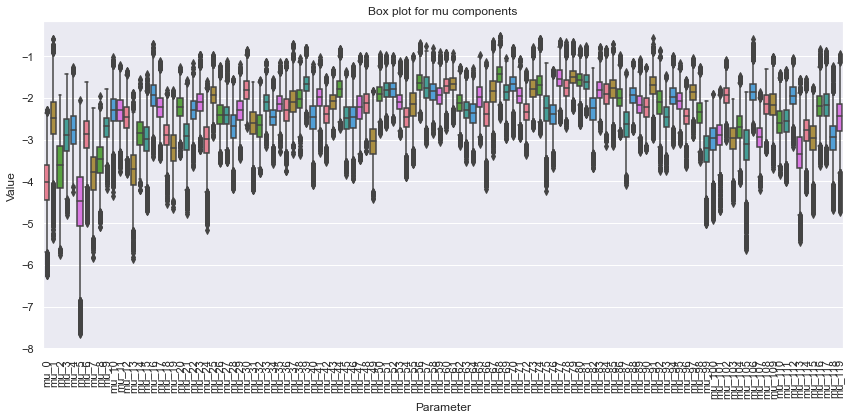

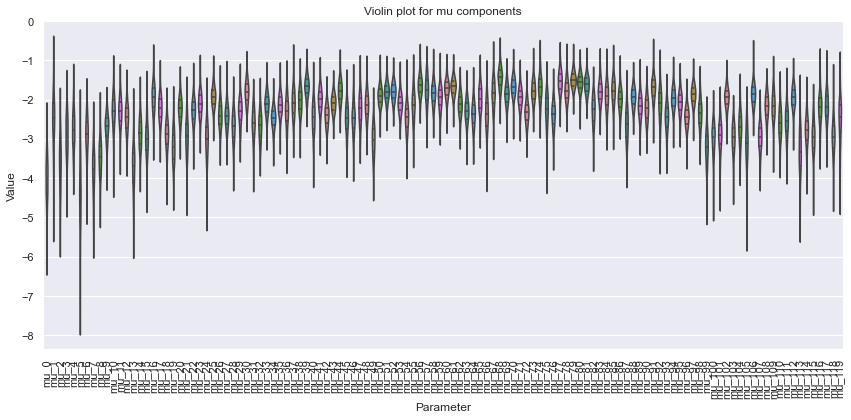

In [27]:
# Set the style for the plots and define custom color palette
sns.set(style="darkgrid")
custom_palette = sns.color_palette("husl")

# Trace plots
def plot_trace(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        ax.plot(chains[burn_in:, idx], color=custom_palette[idx], alpha=0.7)
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Histograms
def plot_histograms(chains, param_names, burn_in=0):
    n_params = len(param_names)
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 3 * n_params))

    for idx, ax in enumerate(axes):
        sns.histplot(chains[burn_in:, idx], kde=True, ax=ax, color=custom_palette[idx])
        ax.set_title(param_names[idx])

    plt.tight_layout()
    plt.show()

# Summary statistics
def summarize_chains(chains, param_names, burn_in):
    summary_df = pd.DataFrame(chains[burn_in:], columns=param_names).describe().transpose()
    return summary_df

# Boxplot and violinplot
def plot_distributions(chains, param_names, burn_in, plot_type='boxplot', title=None):
    melted_df = pd.DataFrame(chains[burn_in:], columns=param_names).melt(var_name='Parameter', value_name='Value')
    plt.figure(figsize=(12, 6))
    if plot_type == 'boxplot':
        sns.boxplot(x='Parameter', y='Value', data=melted_df, palette=custom_palette)
    elif plot_type == 'violinplot':
        sns.violinplot(x='Parameter', y='Value', data=melted_df, inner="quartile", palette=custom_palette)
    if title:
        plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot trace plots and histograms for alpha, beta1, beta2, sigma2
param_names = ['alpha', 'beta1', 'beta2', 'sigma2']
plot_trace(chain4, param_names, burn_in)
plot_histograms(chain4, param_names, burn_in)

#number of stratas
N = df.shape[0]

# Plot boxplot and violinplot for b components
b_param_names = [f'b_{i}' for i in range(N)]
plot_distributions(b_chain, b_param_names, burn_in, plot_type='boxplot', title="Box plot for b components")
plot_distributions(b_chain, b_param_names, burn_in, plot_type='violinplot', title="Violin plot for b components")

# Plot boxplot and violinplot for mu components
mu_param_names = [f'mu_{i}' for i in range(N)]
plot_distributions(mu_chain, mu_param_names, burn_in, plot_type='boxplot', title="Box plot for mu components")
plot_distributions(mu_chain, mu_param_names, burn_in, plot_type='violinplot', title="Violin plot for mu components")


## Interprétation

Ensuite, nous allons tracer la courbe des log-odds en fonction des années pour interpréter les résultats de nos estimations.

La courbe des log-odds est un outil utile pour visualiser la relation entre une variable de résultat binaire et une variable prédictrice continue. Dans notre cas, la variable de résultat binaire est la présence ou l'absence du cancer chez les enfants, et la variable prédictrice continue est le temps (en années). En traçant la courbe des log-odds, nous pouvons voir comment la probabilité de l'événement change au fil du temps.

In [33]:
def calculer_intervalle_confiance_logpsi(chain_1, chain_2, année, burn_in=1000):
    échantillons_alpha = chain_1[burn_in:, 0]
    échantillons_beta1 = chain_1[burn_in:, 1]
    échantillons_beta2 = chain_1[burn_in:, 2]
    échantillons_b = chain_2[burn_in:]

    échantillons_logpsi = np.zeros((échantillons_alpha.shape[0], année.shape[0]))

    for i, (alpha, beta1, beta2) in enumerate(zip(échantillons_alpha, échantillons_beta1, échantillons_beta2)):
        échantillons_logpsi[i] = alpha + beta1 * année + beta2 * (année**2 - 22) + np.mean(échantillons_b[i], axis=0)

    logpsi_moyen = np.mean(échantillons_logpsi, axis=0)
    logpsi_bas, logpsi_haut = np.percentile(échantillons_logpsi, [2.5, 97.5], axis=0)

    return logpsi_moyen, logpsi_bas, logpsi_haut

def tracer_logpsi_avec_intervalle_confiance(année, logpsi_moyen, logpsi_bas, logpsi_haut):
    plt.figure(figsize=(10, 6))
    plt.plot(année, logpsi_moyen, linestyle='-', marker='o', markersize=3, label="Taux de log-odds moyen")
    plt.fill_between(année, logpsi_bas, logpsi_haut, alpha=0.3, label="Intervalle de confiance à 95%")
    plt.title("Taux de log-odds moyen en fonction de l'année de naissance")
    plt.ylabel("Taux de log-odds")
    plt.xlabel("Année")
    plt.legend()
    plt.show()


## Calculer la moyenne et l'intervalle de confiance à 95% de log-psi

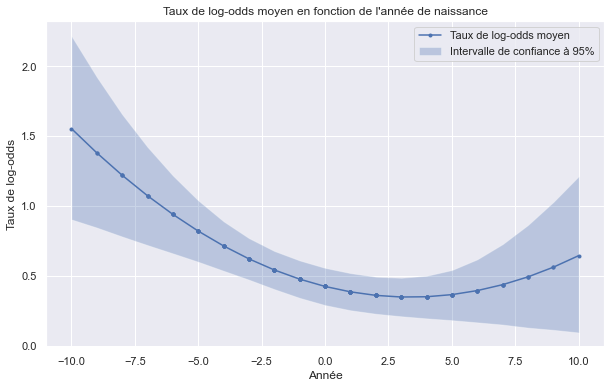

In [34]:
logpsi_moyen, logpsi_bas, logpsi_haut = calculer_intervalle_confiance_logpsi(chain4, b_chain, year, burn_in=1000)
tracer_logpsi_avec_intervalle_confiance(year, logpsi_moyen, logpsi_bas, logpsi_haut)

La courbe obtenue montre l'évolution moyenne du taux de log-odds en fonction de l'année de naissance. La courbe montre une diminution de log(Ψ) avec l'année de naissance, indiquant que le rapport des odds de l'exposition aux rayons X chez les enfants atteints de cancer par rapport aux témoins diminue avec le temps. Cette tendance pourrait suggérer une réduction du risque associé à l'exposition aux rayons X pour les enfants nés plus récemment, probablement en raison de changements dans les pratiques médicales ou d'une sensibilisation accrue aux risques.

Cette découverte est significative car elle suggère que les efforts visant à réduire l'exposition des femmes enceintes et des enfants aux rayons X ont pu être couronnés de succès. Elle souligne également l'importance de continuer à réduire l'exposition inutile aux rayons X dans les établissements médicaux, ainsi que la nécessité de surveiller en permanence les tendances des taux de cancer infantile.